In [36]:
import numpy as np
import h5py
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from skimage.util.montage import montage2d
from skimage.color import label2rgb
import os
import cv2
%matplotlib inline

In [47]:
def tiles(ct, pet, lab):
    ct_tiles = []
    pet_tiles = []
    lab_tiles = []
    tile_size=16
    stride=3
    z=2
    for ct_img, pet_img, label in zip(ct, pet, lab):
        for i in range(0,  ct_img.shape[0], tile_size):
            for j in range(0,  ct_img.shape[1], tile_size):
                for z in range(0,  ct_img.shape[2], tile_size):
                     for i_k in range(0, tile_size, stride):
                        for j_k in range(0, tile_size, stride):
                            for z_k in range(0,tile_size,stride):
                                ct_tiles += [ct_img[i+i_k:(i+i_k+tile_size),j+j_k:(j+j_k+tile_size),z+z_k:(z+z_k+tile_size)]]
                                pet_tiles += [pet_img[i+i_k:(i+i_k+tile_size),j+j_k:(j+j_k+tile_size),z+z_k:(z+z_k+tile_size)]]
                                lab_tiles += [label[i+i_k:(i+i_k+tile_size),j+j_k:(j+j_k+tile_size),z+z_k:(z+z_k+tile_size)]] 
    return(ct_tiles,pet_tiles,lab_tiles)    

In [48]:
def append_data(ct_data,pet_data,lab_data,ct,pet,lab,axis):
    for ct_img, pet_img, lab_img in (zip(ct_data,pet_data,lab_data)):
        ct.append(np.sum(ct_img,axis))
        pet.append(np.sum(pet_img,axis))
        lab.append(np.sum(lab_img,axis))
        return(ct,pet,lab)

In [53]:
ct_tiles0,pet_tiles0,lab_tiles0= [], [], []
ct_tiles1,pet_tiles1,lab_tiles1= [], [], []
ct_tiles2,pet_tiles2,lab_tiles2= [], [], []
ct_data, pet_data, label_data = [], [], []
ct31,pet31,lab31= [], [], []
ct30,pet30,lab30= [], [], []
ct32,pet32,lab32=[],[],[]
with h5py.File(os.path.join('..','input','lab_petct_vox_5.00mm.h5'),'r') as p_data:
    
    ct30,pet30,lab30=append_data(p_data['ct_data'].values(), p_data['pet_data'].values(), p_data['label_data'].values(),ct30,pet30,lab30,0)
    ct31,pet31,lab31=append_data(p_data['ct_data'].values(), p_data['pet_data'].values(), p_data['label_data'].values(),ct31,pet31,lab31,1)
    ct32,pet32,lab32=append_data(p_data['ct_data'].values(), p_data['pet_data'].values(), p_data['label_data'].values(),ct32,pet32,lab32,2)
    
ct_tiles0,pet_tiles0,lab_tiles0=tiles(ct30,pet30,lab30)
ct_tiles1,pet_tiles1,lab_tiles1=tiles(ct31,pet31,lab31)
ct_tiles2,pet_tiles2,lab_tiles2=tiles(ct32,pet32,lab32)
   
print(np.shape(ct_tiles))
l=len(ct_tiles1)-2772
#print(np.shape(ct_tiles))
#print('ct tiles',ct_tiles[0:5:1])

TypeError: append_data() missing 2 required positional arguments: 'lab' and 'axis'

In [3]:
#def img_hist(img, plot=False):
    hist,bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    if plot:
        plt.plot(cdf_normalized, color = 'b')
        plt.hist(img.flatten(),256,[0,256], color = 'r')
        plt.xlim([0,256])
        plt.legend(('cdf','histogram'), loc = 'upper left')
        plt.show()
    return hist, cdf
   


In [4]:
#def hist_eq(img, plot=False, cmap = 'bone'):
    _, cdf = img_hist(img,plot=True)
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    eq_image = cdf[img]
    if plot:
        plt.imshow(cdf[img], cmap=cmap)
        plt.show()
    return eq_image

In [34]:
#ct_tiles = []
pet_tiles = []
lab_tiles = []
tile_size=16
stride=3
for ct_img, pet_img, label in zip(ct_data, pet_data, label_data):
    for i in range(0,  ct_img.shape[0], tile_size):
        for j in range(0,  ct_img.shape[1], tile_size):
            for i_k in range(0, tile_size, stride):
                c=0
                for j_k in range(0, tile_size, stride):
                    c=c+1
                    ct_tiles += [ct_img[i+i_k:(i+i_k+tile_size),j+j_k:(j+j_k+tile_size)]]
                    pet_tiles += [pet_img[i+i_k:(i+i_k+tile_size),j+j_k:(j+j_k+tile_size)]]
                    lab_tiles += [label[i+i_k:(i+i_k+tile_size),j+j_k:(j+j_k+tile_size)]]
l=len(ct_tiles) -2772


In [22]:
n_ct_tiles = [c_tile for c_tile in ct_tiles0[:l] if c_tile.shape == (tile_size,tile_size,tile_size)]
n_pet_tiles = [c_tile for c_tile in pet_tiles0[:l] if c_tile.shape == (tile_size,tile_size,tile_size)]
n_lab_tiles = [c_tile for c_tile in lab_tiles0[:l] if c_tile.shape == (tile_size,tile_size,tile_size)]

n_ct_tiles2 = [c_tile for c_tile in ct_tiles0[l:] ]#if c_tile.shape == (tile_size,tile_size,tile_size)]
n_pet_tiles2 = [c_tile for c_tile in pet_tiles0[l:] if c_tile.shape == (tile_size,tile_size,tile_size)]
n_lab_tiles2 = [c_tile for c_tile in lab_tiles0[l:] if c_tile.shape == (tile_size,tile_size,tile_size)]
#fig, (ax1, ax2, ax3,ax4,ax5,ax6) = plt.subplots(1,6, figsize=(50,50))
#ax1.imshow(montage2d(np.stack(n_ct_tiles,0)), cmap = 'bone')
#ax2.imshow(montage2d(np.stack(n_pet_tiles,0)), cmap = 'bone')
#ax3.imshow(montage2d(np.stack(n_lab_tiles,0)), cmap = 'gist_earth')
#ax4.imshow(montage2d(np.stack(n_ct_tiles2,0)), cmap = 'bone')
#ax5.imshow(montage2d(np.stack(n_pet_tiles2,0)), cmap = 'bone')
#ax6.imshow(montage2d(np.stack(n_lab_tiles2,0)), cmap = 'gist_earth')
#print(ct_tiles)
print(np.shape(n_lab_tiles))
print("hiiii",n_ct_tiles,'hiiiiiii33333')

(61440, 16, 16, 16)
hiiii 

In [28]:
lab_score = [np.mean(c_tile) for c_tile in n_lab_tiles]
lab_score2 = [np.mean(c_tile) for c_tile in n_lab_tiles2]
ct_tile_flat = [c_tile.flatten() for c_tile in n_ct_tiles]
ct_tile_flat2 = [c_tile.flatten() for c_tile in n_ct_tiles2]
pet_tile_flat = [c_tile.flatten() for c_tile in n_pet_tiles]
pet_tile_flat2 = [c_tile.flatten() for c_tile in n_pet_tiles2]
lab_class = [c_score > 0 for c_score in lab_score]
lab_class = [c_score > 0 for c_score in lab_score2]
#print(np.shape(n_lab_tiles))
#print(n_lab_tiles)
#print(lab_score)


In [29]:
train_tiles, test_tile, train_score, test_score = np.stack(pet_tile_flat), np.stack(pet_tile_flat2), lab_score, lab_score2
print('Training size', train_tiles.shape, 'Testing size', test_tile.shape)
print('Train tumor tiles', np.where(train_score), 'Test tumor tiles', np.where(test_score))

Training size (100, 4096) Testing size (100, 4096)
Train tumor tiles (array([], dtype=int64),) Test tumor tiles (array([], dtype=int64),)


In [30]:
from sklearn.neighbors import KNeighborsRegressor
knn1_model = KNeighborsRegressor(2, algorithm = 'kd_tree')

In [31]:
train_tiles[3].shape

(4096,)

In [32]:
knn1_model.fit(train_tiles, train_score)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

In [36]:
test_predictions = knn1_model.predict(test_tile)

#print('Predicted Results', test_predictions)
#print(np.array(train_score)[np.where(np.array(train_score)>5)])
#print(knn1_model.kneighbors(np.array(test_tile),2))
#for i in range(10):
tt = knn1_model.kneighbors(np.array(test_tile),2,return_distance=False)
#plt.plot(tt)
#plt.show()
print(np.shape(tt))
#plt.plot([1,2,3,4],[3,6,5,2],[1,3,5,6])
#plt.plot(knn1_model.kneighbors(np.array(test_tile),2),return_distance=False)
n1=train_tiles[tt[83][0]].reshape((10,10))
n2=train_tiles[tt[83][1]].reshape((10,10))
n1_score = train_score[tt[83][0]]
n2_score = train_score[tt[83][1]]
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(50,50))
ax1.imshow(test_tile[83].reshape((10,10)), cmap = 'bone')
ax1.set_title('predicted: ' + str((n1_score+n2_score)/2) + ',  actual_value: ' + str(test_score[83]))
ax2.imshow(n1, cmap = 'bone')
ax2.set_title(str(n1_score))
ax3.imshow(n2, cmap = 'bone')
ax3.set_title(str(n2_score))
plt.show()
 
aa=np.array(test_score) - np.array(test_predictions) !=0
print(np.where(aa))

    

(100, 2)


ValueError: cannot reshape array of size 4096 into shape (10,10)

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(np.array(test_score)>0, np.array(test_predictions)>0)

array([[1743,   32],
       [ 132,   13]])

(-0.1, 1.1)

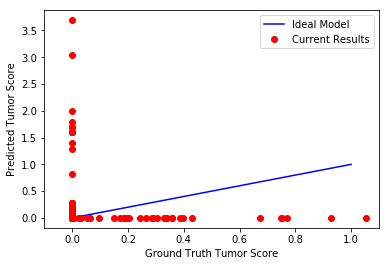

In [12]:
fig, ax1 = plt.subplots(1,1)
ax1.plot([0,1], [0,1], 'b-', label = 'Ideal Model')
ax1.plot(test_score, test_predictions, 'ro', label = 'Current Results')
ax1.set_xlabel('Ground Truth Tumor Score')
ax1.legend()
ax1.set_ylabel('Predicted Tumor Score')
ax1.set_xlim(-0.1,1.1)